# **MOVIE RECOMMENDATIONS SYSTEM** 
    # Building Recommendation System to predict User prefrences for Entertainment Product

# EDA

1. What does the data mean?
2. Data cleaning (remove null values, outlier analysis, etc.)
3. Keeping in mind the broad categories of recommendation system algorithms, what features you will need and why?
4. Perform data visualization on the dataset provided like; popularity of various genres, most rated movies, highest rated movies, least rated movies, etc.

*DATA DISCRIPTION*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install surprise
import surprise
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from surprise.model_selection import GridSearchCV
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset, SVD, model_selection

ratings=pd.read_csv('/content/drive/My Drive/datasets/Ratings .csv')
movies=pd.read_csv('/content/drive/My Drive/datasets/movies.csv')
userdata=pd.read_csv('/content/drive/My Drive/datasets/user_data.csv')

#merge datasets:: ratings,movies and userdata
d=pd.merge(userdata,ratings,on='UserID',how='left')
df=pd.merge(d,movies,on='MovieID',how='left')

In [ ]:
#Shapes of datasets:
print('shape of ratings dataset ::',ratings.shape)
print('shape of movies dataset ::',movies.shape)
print('shape of userdata dataset ::',userdata.shape)

shape of ratings dataset :: (1000209, 4)
shape of movies dataset :: (3883, 3)
shape of userdata dataset :: (6040, 5)


In [ ]:
d=pd.merge(userdata,ratings,on='UserID',how='left')
df=pd.merge(d,movies,on='MovieID',how='left')

In [ ]:
num_cols=df.columns # dispaly numerical and categorical features
continues= []
categorical =[ ]
for i in num_cols:
  if(len(df[i].unique()))>=(df.shape[0]/25):
     continues.append(i)
  else:
    categorical.append(i)
print ('continue variables',continues,'\n','Categorical Variables',categorical) 

continue variables ['Timestamp'] 
 Categorical Variables ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'MovieID', 'Rating', 'Title', 'Genres']


In [ ]:
split_data,split_data.Genres = df.iloc[[i   for i,j in enumerate(df['Genres']) for value in j.split("|")] , :],[value for i in df['Genres'] for value in i.split("|")]
split_data.head(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Children's
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Children's
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Comedy


***4. Perform data visualization on the dataset provided like; popularity of various genres, most rated movies, highest rated movies, least rated movies, etc.***

***Univariate Analysis***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31ba3529e8>,
      dtype=object)

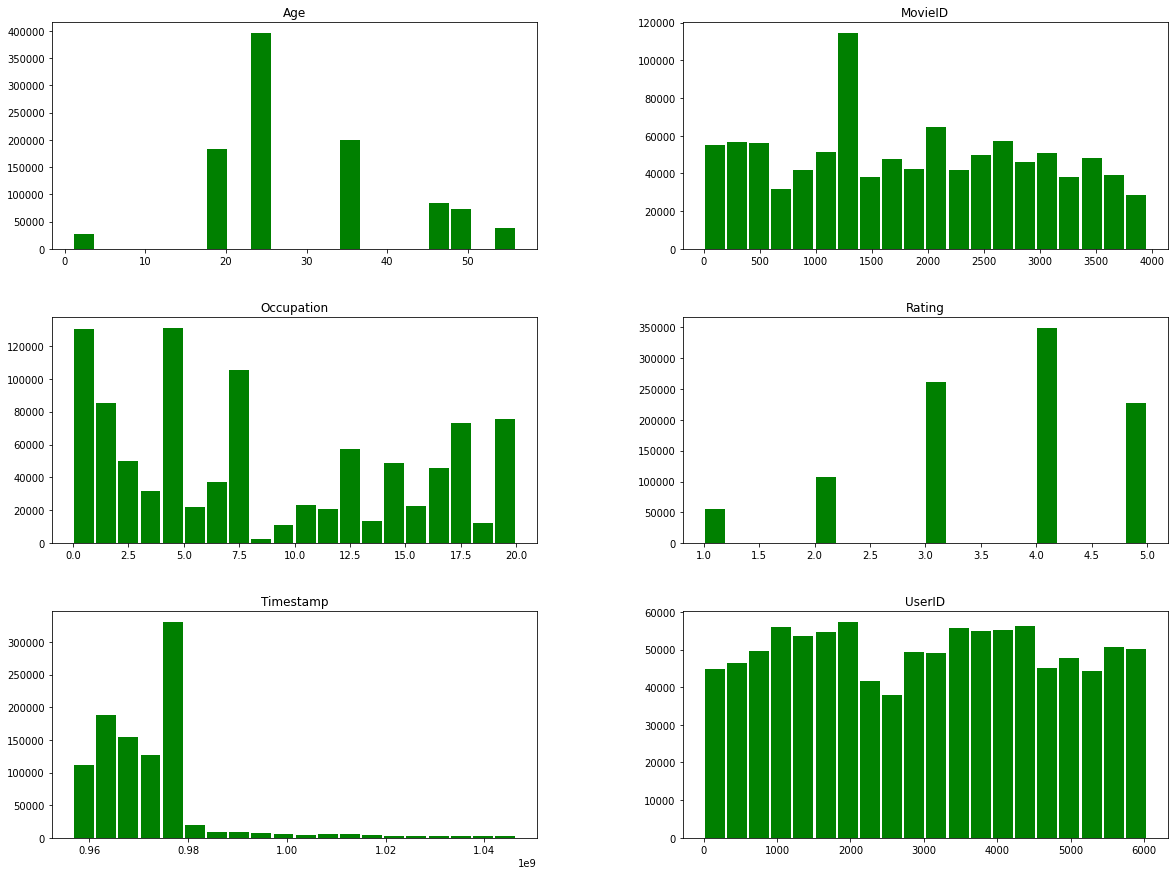

In [ ]:
df.hist(figsize=[20,15],bins=20,grid=False,color='g', zorder=2, rwidth=0.9)

 ***INFRENCES:***


*   There is maximum number of users who's age lies between 25 to 30
*   mostly **School/grade students** and **other or not specified** occupations's user watched the max of movies
*   maximum of movies are **4-star** rated
*   Timestamp Histogram shows there is an outlier in dataset
*   Farmers don't like movies compare to other users
*   Frequency of MovieID and UserID are continuouly increases or decreases.



***Popularity of various Occupations***

Text(0.5, 0, 'Occupation')

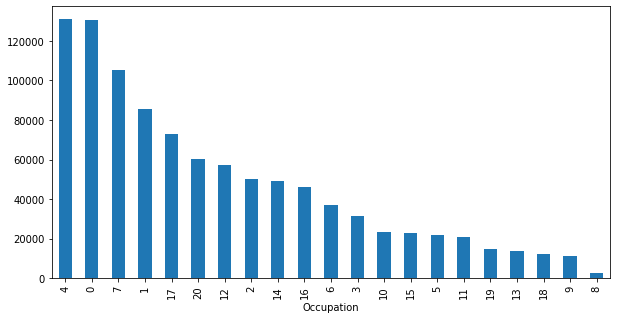

In [ ]:
df['Occupation'].value_counts().plot.bar(figsize=[10,5]).set_xlabel('Occupation')
# 4 represents school/grade student ,0= other or not specified
# user who's belongs 4 and 0 occupation has maximum number in dataset

*  Highest frequency is for Ocuupation 4(**School/grade student**)
*  Lowest frequency is for Occupation 8 (**Farmer**)

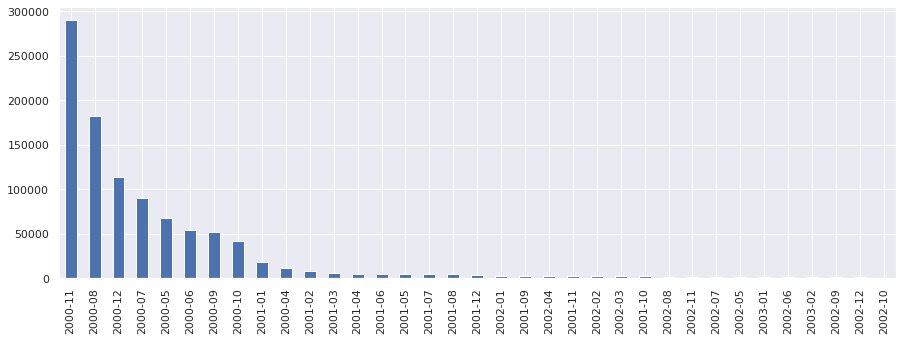

In [ ]:
df['Temp_Time'].value_counts().plot.bar(figsize=[15,5])

***Infrences***
*  The ratings given to movies in the year 2000 and month November are highest
*  In the year 2001 and 2002 as seen from the above graph the ratings given to movies is almost equivalent to 0

***Gender Distribution***

Gender
F    1709
M    4331
dtype: int64


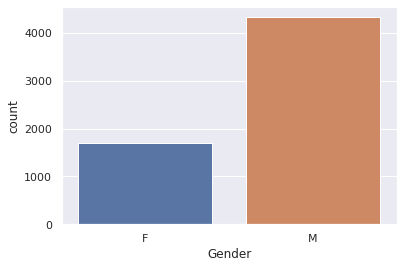

In [ ]:
print(userdata.groupby('Gender').size())
sns.set(style="darkgrid")
ax = sns.countplot(x="Gender", data=userdata)

***INFRENCE***
*  Frequency of number of users is higher for male as compare to female.


***Age Distribution***

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64


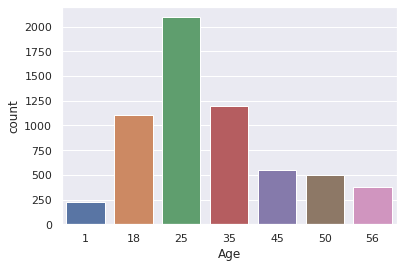

In [ ]:
print(userdata.groupby('Age').size())
sns.set(style="darkgrid")
ax = sns.countplot(x="Age", data=userdata)

***INFRENCE***
*  The above distribution shows that the most of the users are 25 years old



Rating
1     56174
2    107557
3    261197
4    348971
5    226310
dtype: int64


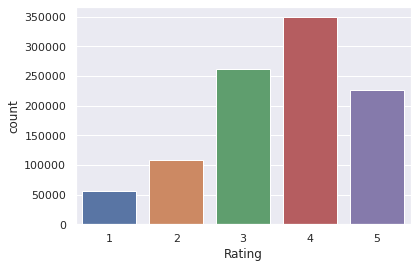

In [ ]:
#Rating Distribution
l=df.groupby('Rating').count()[['Title']]
print(df.groupby('Rating').size())
sns.set(style="darkgrid")
ax = sns.countplot(x="Rating", data=df)

***Bivariate Analysis***

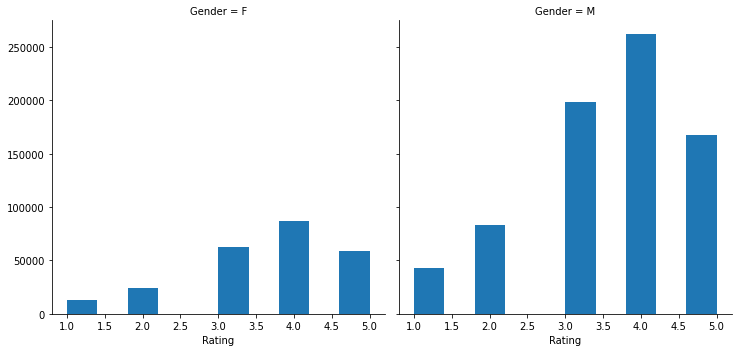

In [ ]:
##Distribition of different Gender vs Ratings
a=sn.FacetGrid(df,col='Gender',col_wrap=4,height=5)
a=a.map(plt.hist,'Rating')

*  **Most of Male user who rate or watched the max of movies**

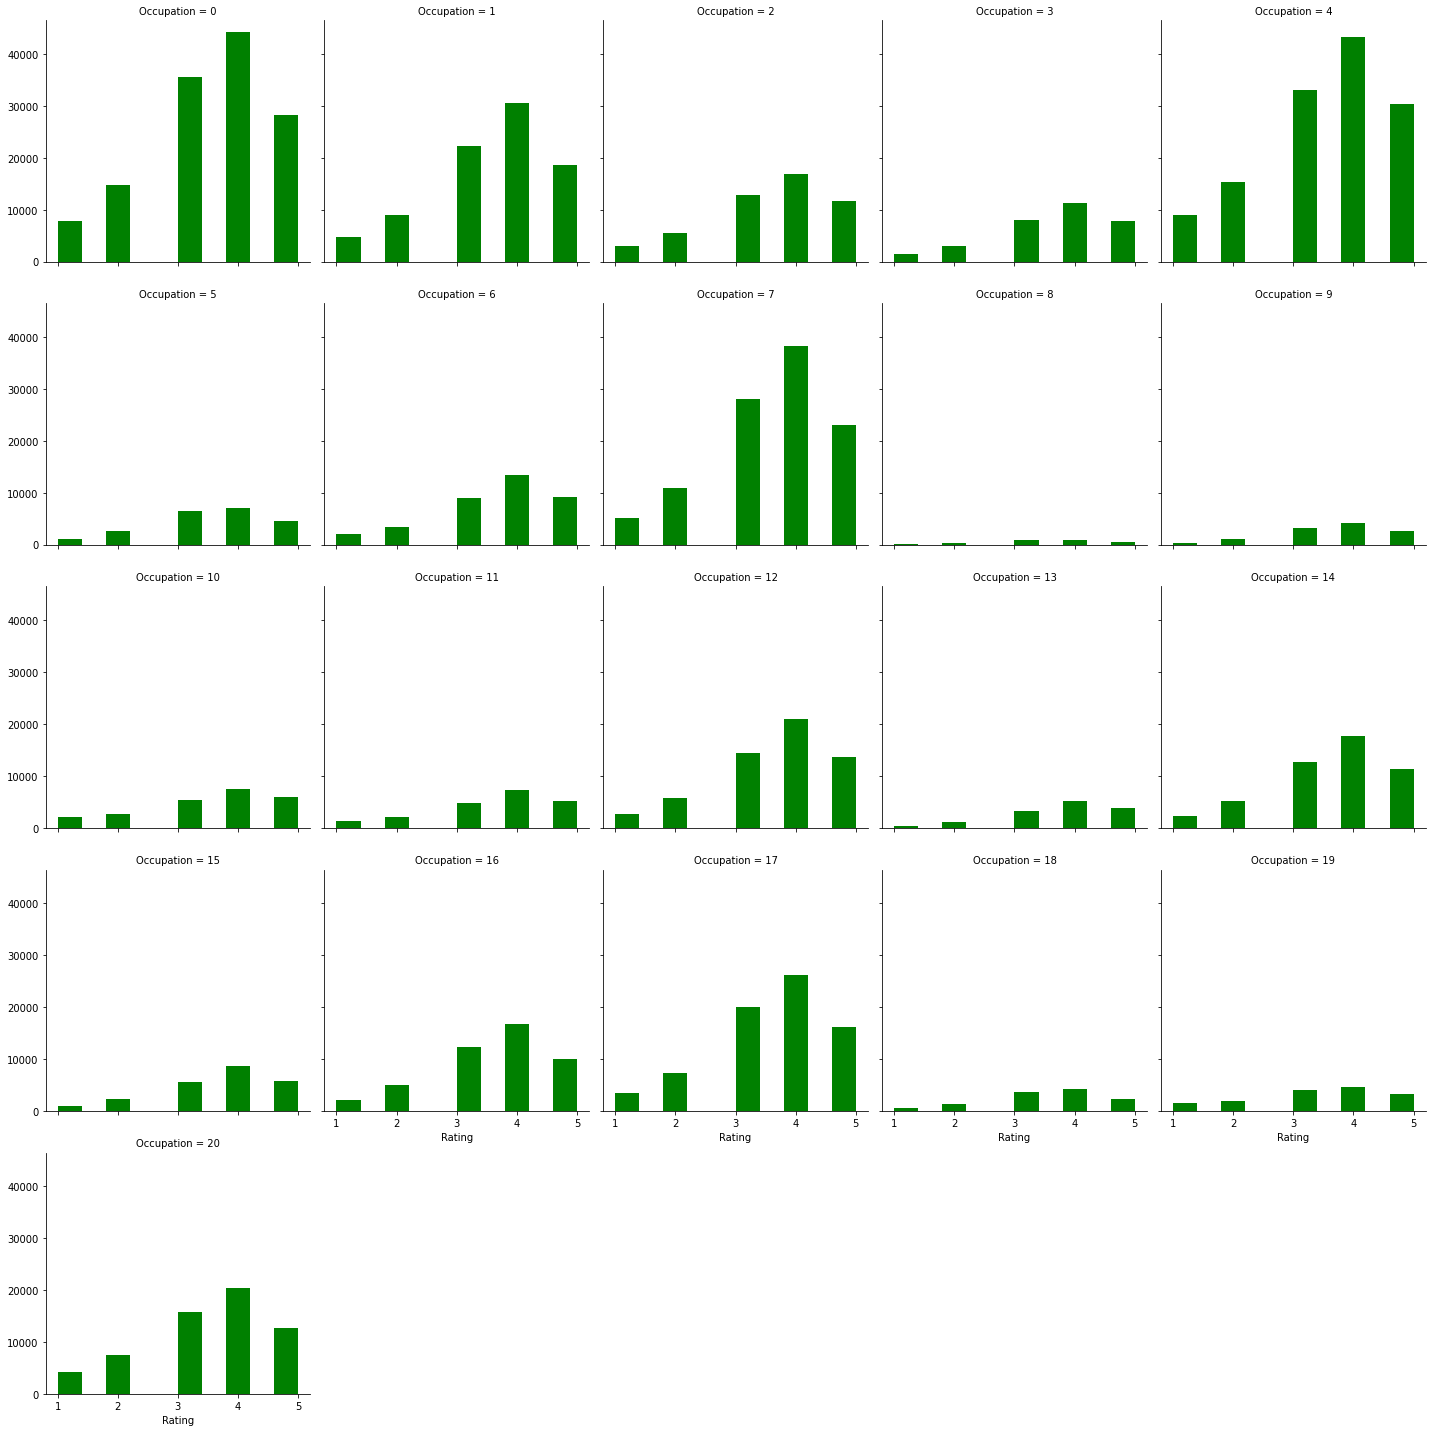

In [ ]:
##Distribition of different occupation vs Ratings of movies
a=sn.FacetGrid(df,col='Occupation',col_wrap=5,height=4,aspect=1)
a=a.map(plt.hist,'Rating',color='g')

In [ ]:
#Average Rated Genres
r= split_data.groupby(['Genres'], as_index=False)['Rating'].aggregate(np.mean)
r.head(10).sort_values(by='Rating',ascending=False)

,Genres,Rating
9,Film-Noir,4.075188
6,Documentary,3.933123
7,Drama,3.766332
5,Crime,3.708679
2,Animation,3.684868
4,Comedy,3.522099
0,Action,3.491185
1,Adventure,3.477257
8,Fantasy,3.447371
3,Children's,3.422035


***Popularty of Movies Genres***

<BarContainer object of 10 artists>

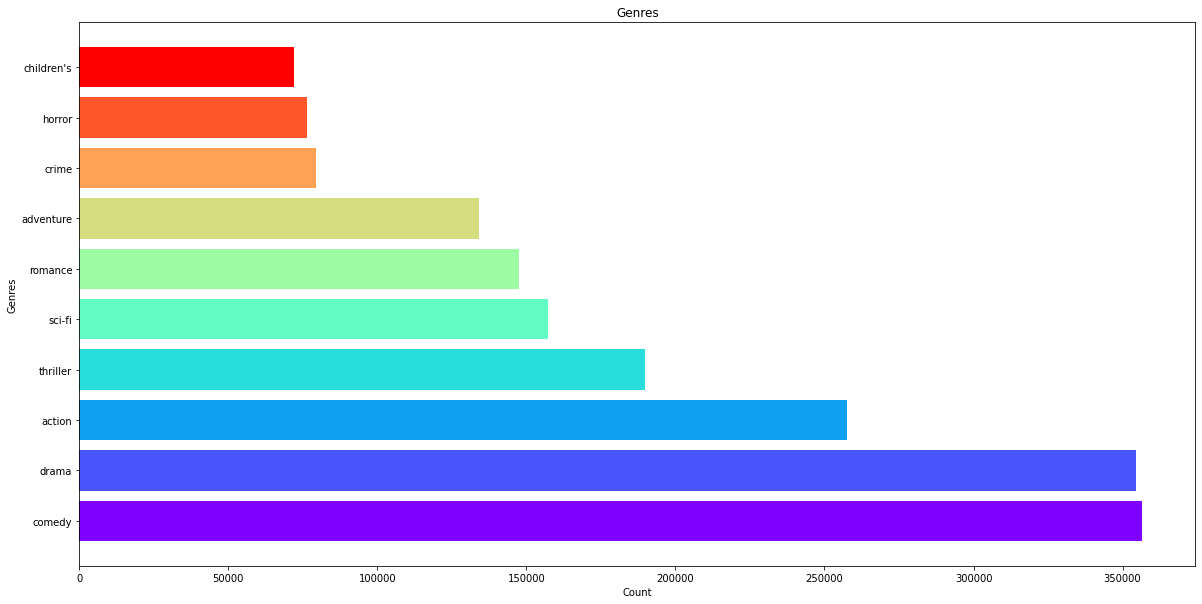

In [ ]:
gen = ' '.join(split_data['Genres'].str.lower())
filtered_words = [word for word in gen.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.barh(words, counts, color=colors)

***INFRENCES***
*  In the above plot **Comedy** is the most rated movies genres.
* **Action,Drama** and Thriller are also among the most rated after comedy.We think This encapsulates the idea of presence of comedy in large amount in movies genres.

* Least occurent genres are **Documentary,film-Noir,Western**.

***Most rated movies***

                                                    Rating
Title                                                     
American Beauty (1999)                                3428
Star Wars: Episode IV - A New Hope (1977)             2991
Star Wars: Episode V - The Empire Strikes Back ...    2990
Star Wars: Episode VI - Return of the Jedi (1983)     2883
Jurassic Park (1993)                                  2672
Saving Private Ryan (1998)                            2653
Terminator 2: Judgment Day (1991)                     2649
Matrix, The (1999)                                    2590
Back to the Future (1985)                             2583
Silence of the Lambs, The (1991)                      2578
Men in Black (1997)                                   2538
Raiders of the Lost Ark (1981)                        2514
Fargo (1996)                                          2513
Sixth Sense, The (1999)                               2459
Braveheart (1995)                                     24

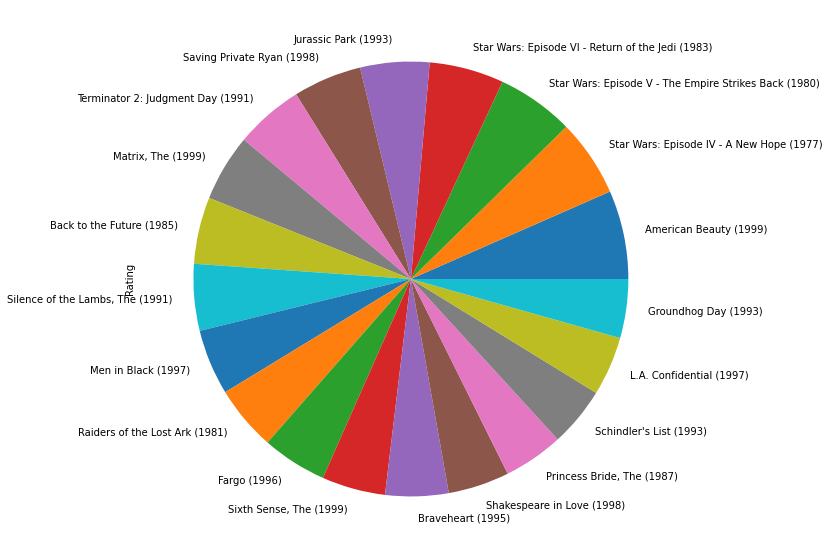

In [ ]:
#Top 20 most rated movies
h=df.groupby('Title').count().sort_values(ascending=False,by='Rating')[['Rating']]
print(h.head(20))
df.groupby('Title')['Rating'].count().nlargest(20).plot(kind='pie',figsize=[15,10])

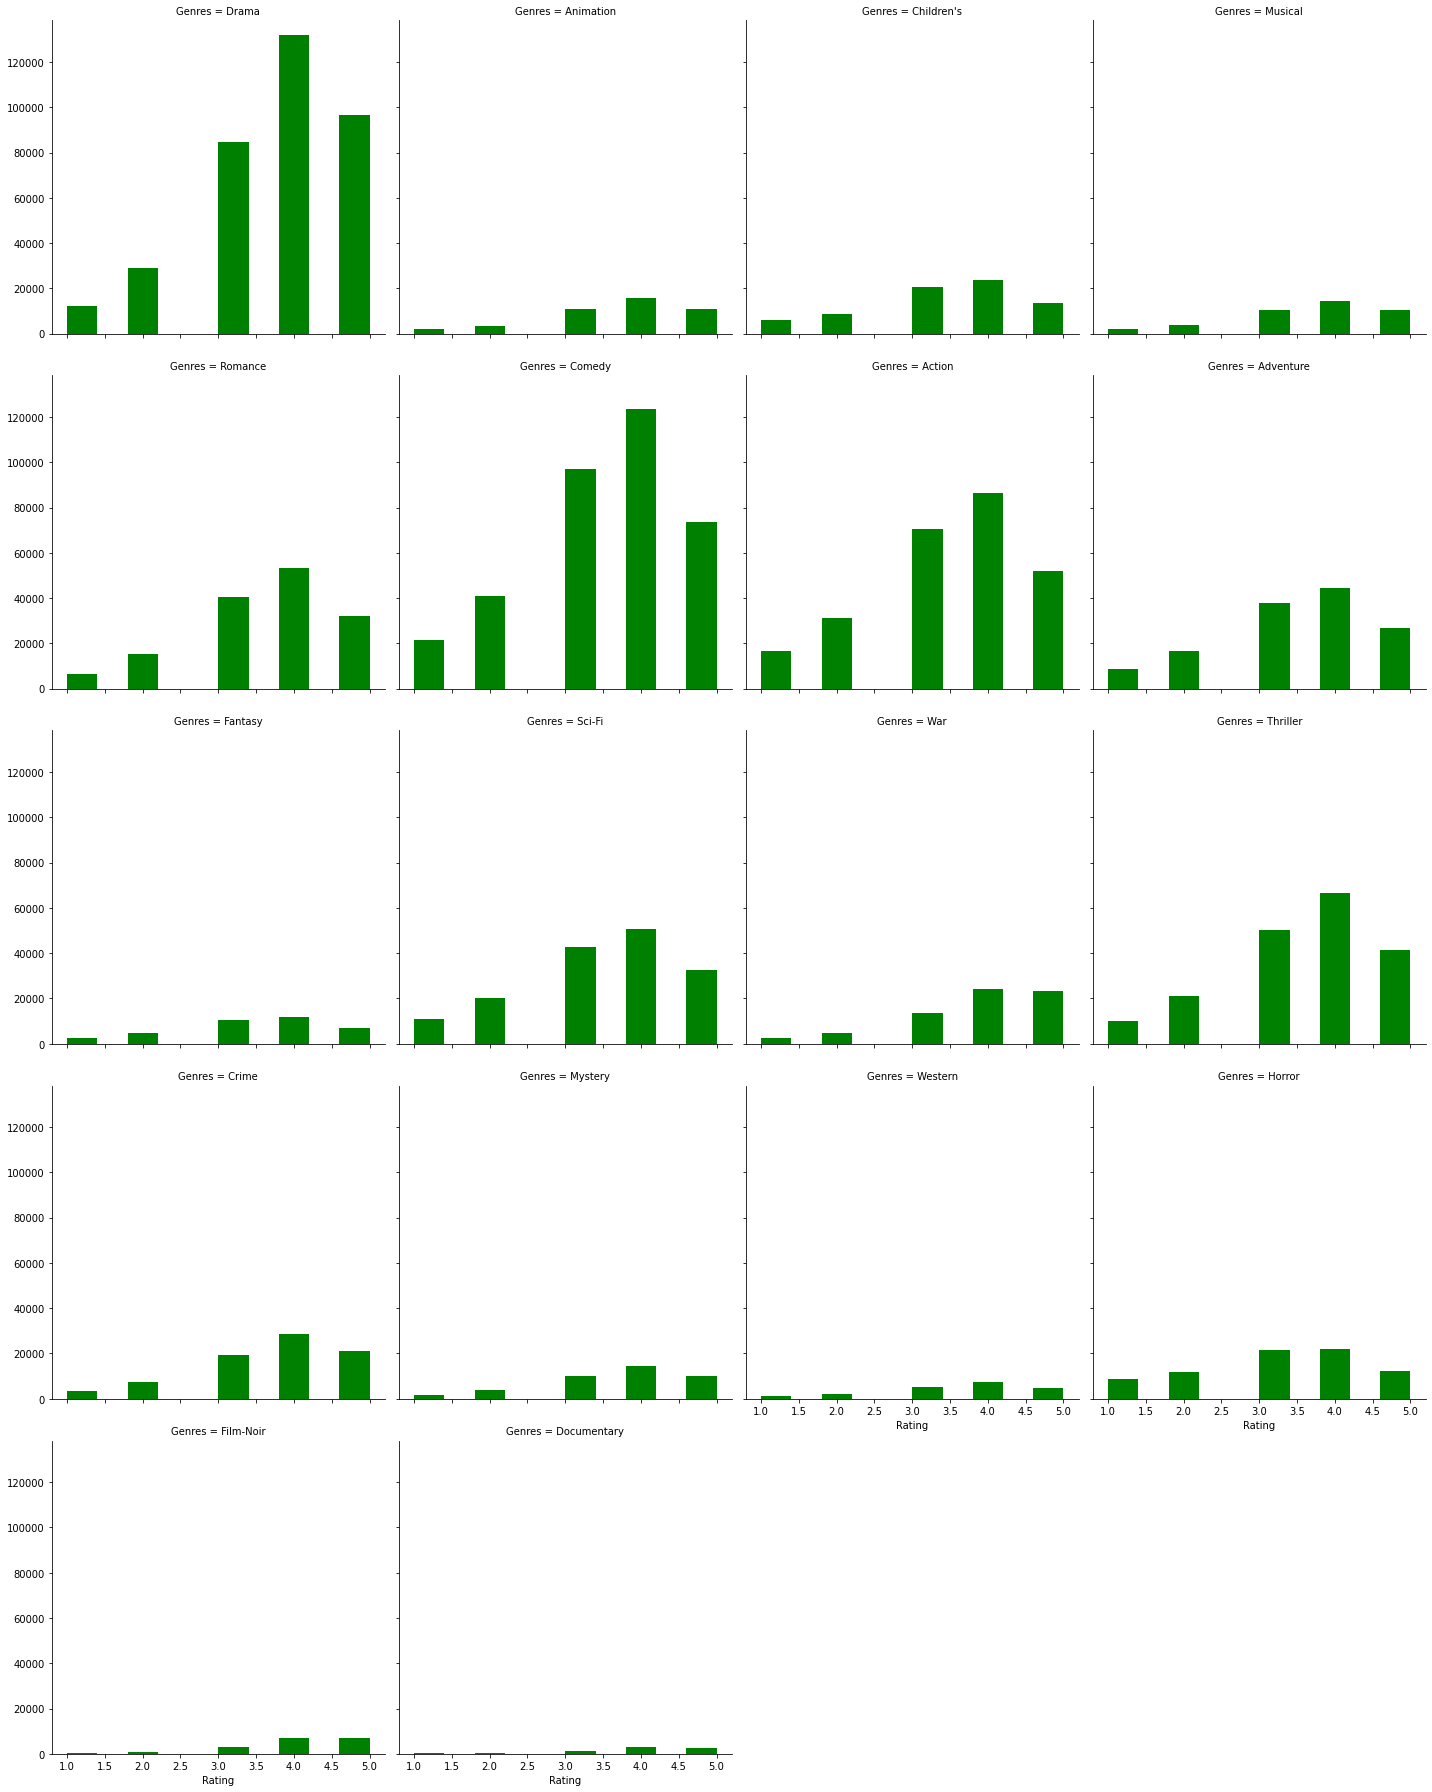

In [ ]:
#Genres comparision based on Ratings
a=sn.FacetGrid(split_data,col='Genres',col_wrap=4,height=5,)
a=a.map(plt.hist,'Rating',color='g')

***Infrences***

*  **Drametic** and **Comedy** movies are mostly liked by users
*  And Documentry has least likes as compared to other Genres

***Highest rated movies***

In [ ]:
#Top 10 Highest Rated movies
hr= df['Rating']>4
s=df[hr].head(10)
s

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
6,1,F,1,10,48067,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama
7,1,F,1,10,48067,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama
10,1,F,1,10,48067,595,5,978824268,Beauty and the Beast (1991),Animation|Children's|Musical
14,1,F,1,10,48067,1035,5,978301753,"Sound of Music, The (1965)",Musical
18,1,F,1,10,48067,3105,5,978301713,Awakenings (1990),Drama
22,1,F,1,10,48067,1270,5,978300055,Back to the Future (1985),Comedy|Sci-Fi
23,1,F,1,10,48067,527,5,978824195,Schindler's List (1993),Drama|War
25,1,F,1,10,48067,48,5,978824351,Pocahontas (1995),Animation|Children's|Musical|Romance


***Least rated movies***

In [ ]:
#Top 5 least Rated movies
lr= df['Rating']<2
df[lr].head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
148,2,M,56,16,70072,21,1,978299839,Get Shorty (1995),Action|Comedy|Drama
180,2,M,56,16,70072,3893,1,978299535,Nurse Betty (2000),Comedy|Thriller
205,3,M,25,15,55117,1261,1,978297663,Evil Dead II (Dead By Dawn) (1987),Action|Adventure|Comedy|Horror
249,4,M,45,7,2460,3527,1,978294008,Predator (1987),Action|Sci-Fi|Thriller
268,5,M,25,20,55455,2916,1,978245645,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller


In [ ]:
#unique movie genre
u_Genres=split_data['Genres'].unique().tolist()
print([u_Genres])
print('Total Movie Genres:',len(u_Genres))

[['Drama', 'Animation', "Children's", 'Musical', 'Romance', 'Comedy', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller', 'Crime', 'Mystery', 'Western', 'Horror', 'Film-Noir', 'Documentary']]
Total Movie Genres: 18


In [ ]:
#top 25 most rated movies
most_rated = df.groupby('Title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

***2. Data cleaning (remove null values, outlier analysis, etc.***


***Handling Missing values***

In [ ]:
#Detect Misiing or Null Values
#Missing data percentage list
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
print('\n')
print('Count NUll values : ')
df.isnull().sum()

UserID - 0.0%
Gender - 0.0%
Age - 0.0%
Occupation - 0.0%
Zip-code - 0.0%
MovieID - 0.0%
Rating - 0.0%
Timestamp - 0.0%
Title - 0.0%
Genres - 0.0%


Count NUll values : 


UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
dtype: int64

***So in Dataset there is no missing value***

***Handling Outliers***

In [ ]:
Num_cols=df._get_numeric_data()
Num_cols.head(2)

,UserID,Age,Occupation,MovieID,Rating,Timestamp
0,1,1,10,1193,5,978300760
1,1,1,10,661,3,978302109


In [ ]:
Num_F=['UserID','Age','Occupation','MovieID','Rating','Timestamp']
df[Num_F].skew()

UserID        0.005735
Age           0.398471
Occupation    0.404363
MovieID       0.092436
Rating       -0.553610
Timestamp     2.765691
dtype: float64

*  If skewness value lies between -1 and 1 then the data is normally distributed and any major deviation from this range indicates the presence of extreme values.
*  Here we see only Timestamp has ouliers and other features skewness is bearable
* Since Age Ratings and are contain numerical data so we check for the outliers in them.



In [ ]:
len(df['Timestamp'].unique())

458455

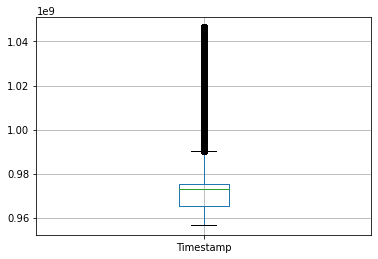

In [ ]:
df.boxplot(column='Timestamp')

*  In user rating dataset has a timestamp column which stores the last time the rating was updated. it is the time mentioned in seconds when the rating was provided. because of it is a time. it is be like primary key or it has more then 45000 unique values.It is different for different users. we can't perform outlier treatment on this column.

***3. Keeping in mind the broad categories of recommendation system algorithms, what features you will need and why?***

*Label Encoding*

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_=df.copy()
le_df=pd.DataFrame()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_[i])
for j in list(df_._get_numeric_data().columns):
  le_df[j]=df_[j]
le_df.head()

,Title,Genres,Gender,Zip-code,UserID,Age,Occupation,MovieID,Rating,Timestamp
0,2452,239,0,1429,1,1,10,1193,5,978300760
1,1739,152,0,1429,1,1,10,661,3,978302109
2,2289,282,0,1429,1,1,10,914,3,978301968
3,1054,239,0,1429,1,1,10,3408,4,978300275
4,557,145,0,1429,1,1,10,2355,5,978824291


In [ ]:
corr = le_df.corr()
corr.head()

,Title,Genres,Gender,Zip-code,UserID,Age,Occupation,MovieID,Rating,Timestamp
Title,1.000000,-0.063523,0.000972,0.003718,-0.000375,-0.008961,-0.000030,-0.015053,0.012247,-0.001234
Genres,-0.063523,1.000000,-0.073500,-0.014125,0.004665,0.059269,-0.015023,0.029295,0.060061,0.016395
Gender,0.000972,-0.073500,1.000000,-0.015056,-0.035042,-0.003189,0.114974,0.021626,-0.019861,0.022001
Zip-code,0.003718,-0.014125,-0.015056,1.000000,-0.044845,0.003513,0.035743,0.000758,0.000776,0.028769
UserID,-0.000375,0.004665,-0.035042,-0.044845,1.000000,0.034688,-0.026698,-0.017739,0.012303,-0.843524


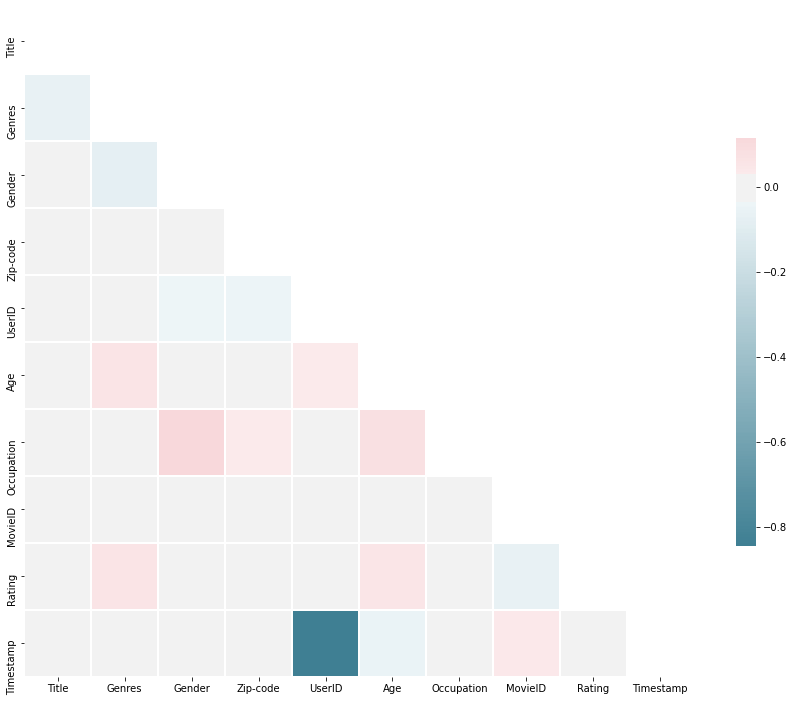

In [ ]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

***Infences:***
*   A score closer to 1 or -1 is a positive or negative relationship. A perfect score of 1 is a direct correlation.
*  in this heat map very light pink means positive, dark voilet means negative. The stronger the color, the larger the correlation magnitude.
*  So by analyzing the above heatmap and correlation matrix ***Timestamp*** and ***Zip-code*** has very negative value ***(-0.843524) ,(-0.044845)*** and it goes on -1 side it negative correlation with other so we can think about to Drop it from dataset because it not contribute much information as comapare to others.

*  And also if think about categories of recommendatiomns systems both are not contribute much as we need Because in ***Content Based Filtering*** we needs user related information which relate it to recommend movies and ***Collaborative filtering*** is based on the assumption that people who agreed in the past will agree in the future and that they will like similar kind of objects as they liked in the past So according to this scenario we don"t need these features.
*  Features needed **Collaborative filtering***: in this we recommend movies on the basis of ratings provided by user or the similarty of user and we need contains only those features that provide information about the users(i.e.**UserID, Age, User_Rating, Occupation, Gender, Zip-code**)
*  **Content Based filtering**: In this we recommend movies to user on the basis of past history of user and content that it has.In this the algorithm will simply pick an item which similar content to recommender.So in this we need only those features who related to a particular user(i.e. **UserID, MovieID, Title, Genres, Ratings**)

***1. What does the data mean?***

It is MovieLens 1M Dataset provided by **Grouplenc.org.**
here 1,000,209 user ratings of 3883 movies 
made by 6,040 users.

Here we have 3 diffrent datasets:
* **Movies Dataset:** It contains following columns
  *  MovieID: Each movies has a Unique ID 
  *  Title: Titles(Name) of Movies
  *  Genres: Category of Movies(like: Drama, Comedy, Action etc..)
  *  **Shape** : (3883,3)

* **User Datasets:** It Contains following
  *  UserID: Each user who rate the movies has an unique ID
  *  Age: Age of user (*1*:"Under 18", *18*:"18-24", *25*:"25-34", *35*:"35-44", *45*:"45-49", *50*:"50-55, *56*:"56+")
  *  Gender: User'Gender(M or F)
  *  Occupation: It ranges(0-20) each number has represent Occupation of a particular of a User
  *   Zip-code: Area or Zip code of a user
  *  **Shape:** (6040,5)

* **Rating Datasets:**
  *  UserIDs: ranges(1 to 6040)
  *  MovieIDs: range between 1 and 3952
  *  Ratings:   1-5-star rating by user
  *  Timestamp: Represented the time mentioned in seconds when the rating was provided
  *  **Shape:** (1000209,4)


*  All these datasets merge in dataframe based on common column between them,merged datasets **Shape** is **(1000209,10)**
    *  so by using this large dataset we train our model
    and apply it to make a good recommendation system
It shows that one user rate more tFhen one movies so these rows increased
    *  By above analysis the User most like **Drama** and **Comedy** Genres's Movies.

    *  And there is school/grade_student watched the movies mostly.



# CBF-ITEM BASED


***MODEL BASED APPROACH***
 *  ***Using NearestNeighbours(sklearn)***

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

pivot_table=df.pivot_table(index='Title',columns='UserID',values='Rating').fillna(0)
movie_dfm = csr_matrix(pivot_table.values)

print("TRAINING THE MODEL",'\n')
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_dfm)
print("DONE TRAINING THE MODEL", '\n')

# qi = np.random.choice(movie_dfm.shape[0])

distances, indices = model_knn.kneighbors(pivot_table.iloc[1,:].values.reshape(1, -1), n_neighbors = 5)

print('Similar Movies like :',qi, 'MoviID')
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_table.index[qi]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot_table.index[indices.flatten()[i]], distances.flatten()[i]))

TRAINING THE MODEL 

DONE TRAINING THE MODEL 

Similar Movies like : 81 MoviID
Recommendations for Air Up There, The (1994):

1: Cool Runnings (1993), with distance of 0.699259944003483:
2: With Honors (1994), with distance of 0.7160687573357519:
3: Richie Rich (1994), with distance of 0.7207744555502189:
4: Encino Man (1992), with distance of 0.7212004728104829:


***Comparing Performance Of different KNN algorithms***

In [ ]:
from surprise import Reader, Dataset ,KNNWithMeans,KNNBaseline,KNNBasic

reader = Reader(rating_scale=(1,5))  
data = Dataset.load_from_df(ratings[['UserID', 'MovieID', 'Rating']], reader)


methods = {'name':'cosine','user_based': False}
KNN_Means  = KNNWithMeans(sim_options=methods)
KNN_Baseline = KNNBaseline(sim_options=methods)
KNN_Basic = KNNBasic(sim_options=methods)
l=[KNN_Means,KNN_Baseline,KNN_Basic]
for i in l:
  print("CROSS VALIDATING THE DATASET - " ,i, '\n')
  model_selection.cross_validate(i, data, measures=['rmse','MAE'],cv=3, verbose=True)
  print("DONE CROSS VALIDATING THE DATASET",'\n')

CROSS VALIDATING THE DATASET -  <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x7f46995e9a20> 

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8992  0.8992  0.8992  0.8992  0.0000  
MAE (testset)     0.7070  0.7074  0.7068  0.7070  0.0002  
Fit time          16.72   17.24   17.37   17.11   0.28    
Test time         93.67   92.58   94.28   93.51   0.70    
DONE CROSS VALIDATING THE DATASET 

CROSS VALIDATING THE DATASET -  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7f46976cca58> 

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine 

***Performance of KNNwithmeans and KNNBaseline are almost same, So here we decided to perform recommendation using KNNwithmeans***

In [ ]:
#Train KNNwithmeans

print("TRAINING THE MODEL")
trainset = data.build_full_trainset()
KNN_Means.fit(trainset)
print("DONE TRAINING THE MODEL", '\n')

TRAINING THE MODEL
Computing the cosine similarity matrix...
Done computing similarity matrix.
DONE TRAINING THE MODEL 



In [ ]:
testset = trainset.build_anti_testset()
predictions=KNN_Means.test(testset)

In [ ]:
def rec(name):
  f=movies.loc[movies[(movies.Title==name)].index].MovieID.tolist()
  h=KNN_Means.get_neighbors(f,10)
  k=movies.loc[movies[(movies.MovieID.isin(h))].index]
  return k
rec('Toy Story (1995)')

**Memory based Approach**  
* ***Using cosine similarity***

In [ ]:
pivot2= pivot_table.apply(lambda x: x - np.nanmean(x), axis=1)
item_sim_df = pd.DataFrame(cosine_similarity(pivot2, pivot2), index=pivot2.index, columns=pivot2.index)
item_sim_df.head()


def get_similar_movie(Movie_name):
    if Movie_name not in pivot2.index:
        return None, None
    else:
        sim_movies = item_sim_df.sort_values(by=Movie_name, ascending=False).index[:]
        sim_score = item_sim_df.sort_values(by=Movie_name, ascending=False).loc[:, Movie_name].tolist()[1:]
        return sim_movies, sim_score

movies, score = get_similar_movie("'Til There Was You (1997)")
for x,y in zip(movies[:10], score[:10]):
  print(x,'-',y)

If Lucy Fell (1996) - 0.26732069622998056
Picture Perfect (1997) - 0.2557154439632222
To Gillian on Her 37th Birthday (1996) - 0.24105461392120084
Mad Love (1995) - 0.23132587558582302
Practical Magic (1998) - 0.22960163873809433
Something to Talk About (1995) - 0.22618112973033752
Circle of Friends (1995) - 0.22073534764102024
Beautician and the Beast, The (1997) - 0.22071668366822336
Evening Star, The (1996) - 0.2206349626920143
How to Make an American Quilt (1995) - 0.21623572955474876


# CBF- USER BASED

***Model Based Approach***

In [ ]:
reader = Reader(rating_scale=(1,5))  
data = Dataset.load_from_df(ratings[['UserID', 'MovieID', 'Rating']], reader)
methods = {'name':'cosine','user_based': True}
KNN_Means  = KNNWithMeans(sim_options=methods)
KNN_Baseline = KNNBaseline(sim_options=methods)
KNN_Basic = KNNBasic(sim_options=methods)
svd=SVD()
l=[svd,KNN_Means,KNN_Baseline,KNN_Basic]
for i in l:
  print("CROSS VALIDATING THE DATASET - " ,i, '\n')
  model_selection.cross_validate(i, data, measures=['rmse','MAE'],cv=3, verbose=True)
  print("DONE CROSS VALIDATING THE DATASET",'\n')

# print("TRAINING THE MODEL")
# trainset = data.build_full_trainset()
# svd.fit(trainset)
# print("DONE TRAINING THE MODEL", '\n')

CROSS VALIDATING THE DATASET -  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f466562bfd0> 

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8868  0.8861  0.8858  0.8862  0.0004  
MAE (testset)     0.6967  0.6963  0.6964  0.6965  0.0001  
Fit time          40.53   40.39   40.65   40.52   0.11    
Test time         4.14    3.84    3.74    3.91    0.17    
DONE CROSS VALIDATING THE DATASET 

CROSS VALIDATING THE DATASET -  <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x7f46668720b8> 

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9416  0.9435  0.94

***The performance of SVD algorithm is too good as compare to other alogorithms, So here we perform recommendation using SVD***

In [ ]:
testset = trainset.build_anti_testset()
predictions = svd.test(testset)
svdp=pd.DataFrame(predictions)
svd.to_csv('/content/sample_data/svdp')

In [ ]:
#predict rating
y=[]
for i in range(1,6040):
  for j in range(1,3700):
    y.append(svd.predict(uid=i, iid=j, r_ui=1))
len(y)

e=pd.DataFrame(y)
e.head()

In [ ]:
e=pd.read_csv('/content/drive/My Drive/datasets/svd_p.csv')  ##Predicted rating dataframe by SVD

In [ ]:
def recommend(userid_, n=20): #Recommend Top N movies to user
  f=e.loc[e[(e.uid==userid_)].est.sort_values(ascending=False).index][:10].iid.tolist()
  p=movies.loc[movies[movies.MovieID.isin(f)].index]
  k = ratings.loc[ratings[(ratings.UserID==userid_)].index]['MovieID'].tolist()
  return p.loc[p[~p.MovieID.isin(k)].index]
  #return p
recommend(5, 10)

,MovieID,Title,Genres
243,246,Hoop Dreams (1994),Documentary
740,750,Dr. Strangelove or: How I Learned to Stop Worr...,Sci-Fi|War
1162,1178,Paths of Glory (1957),Drama|War
1181,1199,Brazil (1985),Sci-Fi
1194,1212,"Third Man, The (1949)",Mystery|Thriller
1950,2019,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama
3360,3429,Creature Comforts (1990),Animation|Comedy


# CONTENT BASED

***CBF Using TF-IDF Vectorizer*** 

In [ ]:
movies['Genres'] = movies['Genres'].str.split('|')  

movies['Genres'] = movies['Genres'].fillna("").astype('str')

#TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator.
from sklearn.feature_extraction.text import TfidfVectorizer  
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0)
matrix = tf.fit_transform(movies['Genres'])
matrix.shape

from sklearn.metrics.pairwise import linear_kernel
csim = linear_kernel(matrix, matrix)
csim[:5]



titles = movies['Title']
indices = pd.Series(movies.index, index=movies['Title'])

def c_rec(title):
    idx = indices[title]
    sim_sc = list(enumerate(csim[idx]))
    sim_sc = sorted(sim_sc, key=lambda x: x[1], reverse=True)[1:]
    movie_idx = [i[0] for i in sim_sc]
    print('Movies Similar to : ',title)
    yy=pd.DataFrame(movies.Title.iloc[movie_idx])[:10]
    return yy

c_rec('Dracula: Dead and Loving It (1995)')   

Movies Similar to :  Dracula: Dead and Loving It (1995)


,Title
326,Tales from the Hood (1995)
726,Cemetery Man (Dellamorte Dellamore) (1994)
789,"Frighteners, The (1996)"
1221,Braindead (1992)
1235,Bad Taste (1987)
1258,Young Frankenstein (1974)
1310,April Fool's Day (1986)
1409,"Machine, The (1994)"
1934,Gremlins (1984)
1935,Gremlins 2: The New Batch (1990)


***CBF Using CountVectorizer***

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_matrix = cv.fit_transform(movies['Genres'])
cosi_sim = cosine_similarity(cv_matrix, cv_matrix)

titles = movies['Title']
indices = pd.Series(movies.index, index=movies['Title'])


def recommend(title):
  idx = indices[title]
  sim_sc = list(enumerate(cosi_sim[idx]))
  sim_sc = sorted(sim_sc, key=lambda x: x[1], reverse=True)[1:11]
  movie_indices = [i[0] for i in sim_sc]
  print("Movies similar to ==>",title,"are")
  gg=pd.DataFrame(movies['Title'].iloc[movie_indices])
  return gg


recommend('Toy Story (1995)')


Movies similar to ==> Toy Story (1995) are


,Title
1050,Aladdin and the King of Thieves (1996)
2072,"American Tail, An (1986)"
2073,"American Tail: Fievel Goes West, An (1991)"
2285,"Rugrats Movie, The (1998)"
2286,"Bug's Life, A (1998)"
3045,Toy Story 2 (1999)
3542,Saludos Amigos (1943)
3682,Chicken Run (2000)
3685,"Adventures of Rocky and Bullwinkle, The (2000)"
236,"Goofy Movie, A (1995)"
